# membrane module example
+ Raw parameter data
+ initialize model
+ run model
+ calibrate model

In [1]:
%matplotlib inline
import numpy as np
from rational_rc.membrane import MembraneModel

In [2]:
# Case study Raw parameter data
class Param: pass

raw_pars = Param()

# product information
raw_pars.life_product_label_life = 10  # year, defined as 95% confident non-failure
raw_pars.life_std = 0.2 * raw_pars.life_product_label_life # assume if not known, calibrate later for real service conditions
raw_pars.life_confidence = 0.95

# calibration data (if available)
# field survey result
raw_pars.membrane_failure_ratio_field = 0.01
raw_pars.membrane_age_field = 5  # [year]



Pf(g = R-S < 0) from various methods
    sample count: 0.04991
    g integral: 0.05052776704309394
    R S integral: 0.05000000000001138
    beta_factor: 1.646173468174221


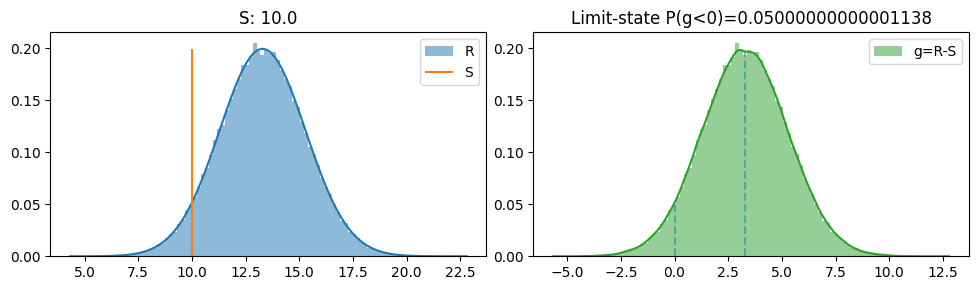

In [3]:
# initialize model
mem_model = MembraneModel(raw_pars)

# run and postproc (uncalibrated)
mem_model.run(10)  # 10 years
mem_model.postproc(plot=True)

In [4]:
# calibration to field data 
mem_model_cal = mem_model.calibrate(raw_pars.membrane_age_field, raw_pars.membrane_failure_ratio_field)



probability of failure:
model: 0.010000011916189768
field: 0.01


Pf(g = R-S < 0) from various methods
    sample count: 0.17698
    g integral: 0.17780263649262504
    R S integral: 0.17795324587799488
    beta_factor: 0.9276624423111287


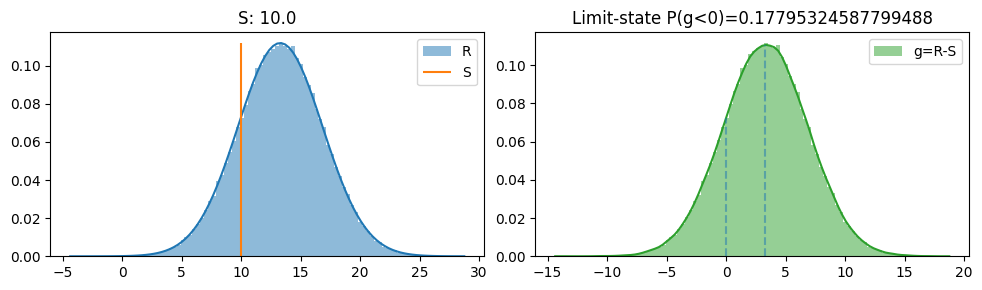

In [5]:
# run and postproc (calibrated)
mem_model_cal.run(10)  # 10 years
mem_model_cal.postproc(plot=True)

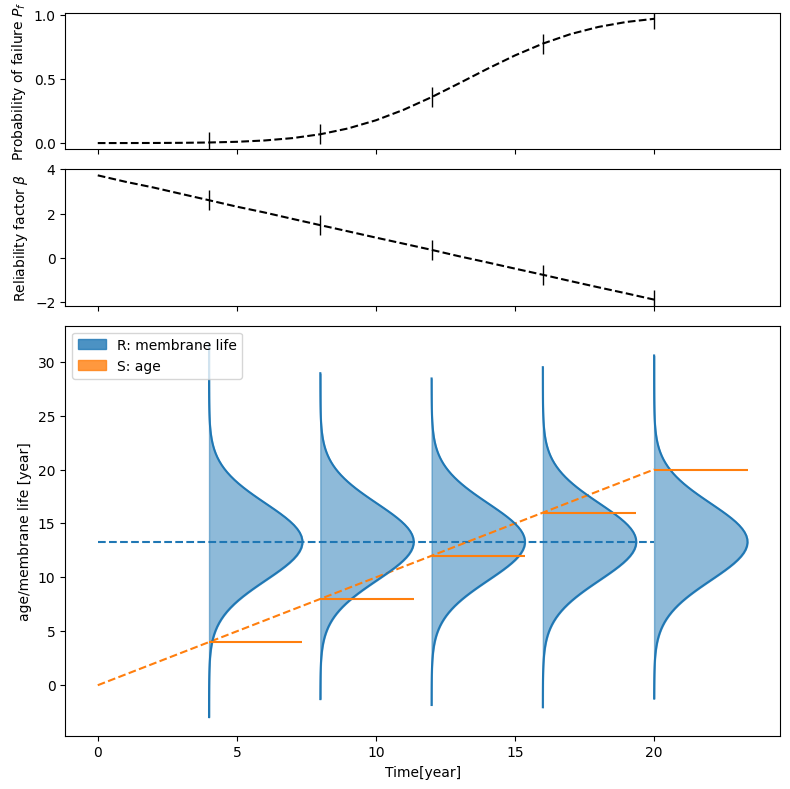

In [6]:
# model with a list of time steps
t_lis = np.arange(0,21,1)
pf_lis, beta_lis = mem_model_cal.membrane_failure_with_year(year_lis=t_lis, plot=True, amplify=30)